In [29]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

## 生成表格
- 生成一个表格形式的结果

In [30]:
import pandas as pd
import numpy as np
import scipy.io as sio
from utils import frokf_sta, frols_sta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("husl")
sns.set_style("whitegrid")

In [31]:
cols = ['noise_var', 'term', 'true_coef', 'FROLS_mean', 'FROLS_var', 'FROLS_mae', 'FROKF_mean', 'FROKF_var', 'FROKF_mae']
linear_ret5 = pd.DataFrame(columns=cols)
nonlinear_ret5 = pd.DataFrame(columns=cols)
linear_ret10 = pd.DataFrame(columns=cols)
nonlinear_ret10 = pd.DataFrame(columns=cols)

- 候选项

In [32]:
con_terms_linear5 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)', 'x1(t-3)', 'x1(t-2)', 'x4(t-1)', 'x5(t-1)', 'x4(t-1)', 'x5(t-1)']  # 9
con_terms_nonlinear5 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)*x1(t-2)', 'x1(t-3)', 'x1(t-2)*x1(t-2)', 'x4(t-1)', 'x5(t-1)', 'x4(t-1)', 'x5(t-1)']  # 9
true_coefs5 = [0.95*np.sqrt(2), -0.9025, 0.5, -0.4, -0.5, 0.25*np.sqrt(2), 0.25*np.sqrt(2), -0.25*np.sqrt(2), 0.25*np.sqrt(2)]  # 9
con_terms_linear10 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)', 'x2(t-3)', 'x1(t-2)', 'x4(t-4)', 'x9(t-2)', 'x4(t-4)', 'x1(t-1)', 'x1(t-2)', 'x7(t-2)', 
                      'x8(t-3)', 'x9(t-3)', 'x8(t-3)', 'x9(t-3)', 'x7(t-4)']  # 16
con_terms_nonlinear10 = ['x1(t-1)', 'x1(t-2)', 'x1(t-2)*x1(t-10)', 'x2(t-3)', 'x1(t-2)', 'x4(t-4)', 'x9(t-2)', 'x4(t-4)', 'x1(t-1)*x1(t-10)', 'x1(t-2)', 'x7(t-2)', 
                      'x8(t-3)', 'x9(t-3)', 'x8(t-3)', 'x9(t-3)', 'x7(t-4)']  # 16
true_coefs10 = [0.95*np.sqrt(2), -0.9025, 0.5, 0.9, -0.5, 0.8, -0.4, -0.8, 0.4, -0.4, -0.9, 0.4, 0.3, -0.3, 0.4, -0.75]  # 16
noises = np.linspace(0.5, 4, 8)
con_terms5 = [2, 1, 1, 3, 2]
con_terms10 = [2, 1, 1, 1, 2, 1, 2, 3, 2, 1]
root = '../data/'

### 5 通道

- 行数 8 种噪音 * 9 候选项 = 72

In [33]:
linear_ret5['noise_var'] = np.hstack([[noises[i]] * 9 for i in range(8)])
linear_ret5['term'] = np.hstack(con_terms_linear5 * 8)
linear_ret5['true_coef'] = np.hstack(true_coefs5 * 8)
nonlinear_ret5['noise_var'] = np.hstack([[noises[i]] * 9 for i in range(8)])
nonlinear_ret5['term'] = np.hstack(con_terms_nonlinear5 * 8)
nonlinear_ret5['true_coef'] = np.hstack(true_coefs5 * 8)

In [34]:
linear_ret5.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
46,3.0,x1(t-2),-0.902500,NaN,NaN,NaN,NaN,NaN,NaN
26,1.5,x5(t-1),0.353553,NaN,NaN,NaN,NaN,NaN,NaN
37,2.5,x1(t-2),-0.902500,NaN,NaN,NaN,NaN,NaN,NaN
12,1.0,x1(t-3),-0.400000,NaN,NaN,NaN,NaN,NaN,NaN
2,0.5,x1(t-2),0.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
nonlinear_ret5.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
58,3.5,x1(t-2)*x1(t-2),-0.500000,NaN,NaN,NaN,NaN,NaN,NaN
32,2.0,x4(t-1),0.353553,NaN,NaN,NaN,NaN,NaN,NaN
34,2.0,x4(t-1),-0.353553,NaN,NaN,NaN,NaN,NaN,NaN
65,4.0,x1(t-2)*x1(t-2),0.500000,NaN,NaN,NaN,NaN,NaN,NaN
30,2.0,x1(t-3),-0.400000,NaN,NaN,NaN,NaN,NaN,NaN


### 10 通道
- 行数 8 种噪音 * 16 候选项 = 128

In [36]:
linear_ret10['noise_var'] = np.hstack([[noises[i]] * 16 for i in range(8)])
linear_ret10['term'] = np.hstack(con_terms_linear10 * 8)
linear_ret10['true_coef'] = np.hstack(true_coefs10 * 8)
nonlinear_ret10['noise_var'] = np.hstack([[noises[i]] * 16 for i in range(8)])
nonlinear_ret10['term'] = np.hstack(con_terms_nonlinear10 * 8)
nonlinear_ret10['true_coef'] = np.hstack(true_coefs10 * 8)

In [37]:
linear_ret10.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
25,1.0,x1(t-2),-0.400000,NaN,NaN,NaN,NaN,NaN,NaN
48,2.0,x1(t-1),1.343503,NaN,NaN,NaN,NaN,NaN,NaN
22,1.0,x9(t-2),-0.400000,NaN,NaN,NaN,NaN,NaN,NaN
69,2.5,x4(t-4),0.800000,NaN,NaN,NaN,NaN,NaN,NaN
98,3.5,x1(t-2),0.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
nonlinear_ret10.sample(5)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
119,4.0,x4(t-4),-0.80,NaN,NaN,NaN,NaN,NaN,NaN
31,1.0,x7(t-4),-0.75,NaN,NaN,NaN,NaN,NaN,NaN
3,0.5,x2(t-3),0.90,NaN,NaN,NaN,NaN,NaN,NaN
53,2.0,x4(t-4),0.80,NaN,NaN,NaN,NaN,NaN,NaN
54,2.0,x9(t-2),-0.40,NaN,NaN,NaN,NaN,NaN,NaN


- 获取各个算法的估计系数与统计信息

In [39]:
for func in ['FROLS', 'FROKF']:
    for dtype in ['linear', 'nonlinear']:
        for dim in [5, 10]:
            info_m, info_v = [], []
            for noise_var in noises:
                m, v = eval(f'{func.lower()}_sta')(dtype, dim, noise_var)
                info_m.extend(list(m))
                info_v.extend(list(v))
            eval(f'{dtype}_ret{dim}')[f'{func}_mean'] = info_m
            eval(f'{dtype}_ret{dim}')[f'{func}_var'] = info_v
            eval(f'{dtype}_ret{dim}')[f'{func}_mae'] = np.abs(eval(f'{dtype}_ret{dim}')[f'{func}_mean'].values - eval(f'{dtype}_ret{dim}')['true_coef'].values)

In [40]:
linear_ret5.tail(18)
linear_ret5.shape

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
54,3.5,x1(t-1),1.343503,1.339125,0.000469,0.004378,1.334964,0.000618,0.008539
55,3.5,x1(t-2),-0.902500,-0.899734,0.000814,0.002766,-0.896654,0.001063,0.005846
56,3.5,x1(t-2),0.500000,0.860806,0.000966,0.360806,0.860432,0.000914,0.360432
57,3.5,x1(t-3),-0.400000,-0.793353,0.001810,0.393353,-0.791806,0.001944,0.391806
58,3.5,x1(t-2),-0.500000,-0.641341,0.000352,0.141341,-0.641822,0.000372,0.141822
59,3.5,x4(t-1),0.353553,0.352840,0.000335,0.000714,0.351965,0.000368,0.001588
60,3.5,x5(t-1),0.353553,0.216313,0.000195,0.137241,0.215944,0.000214,0.137609
61,3.5,x4(t-1),-0.353553,-0.581406,0.000912,0.227853,-0.580461,0.000916,0.226908
62,3.5,x5(t-1),0.353553,0.351509,0.000381,0.002044,0.351293,0.000379,0.002260
63,4.0,x1(t-1),1.343503,1.339442,0.000390,0.004061,1.333009,0.000582,0.010494


(72, 9)

In [41]:
nonlinear_ret5.head(18)
nonlinear_ret5.shape

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
0,0.5,x1(t-1),1.343503,1.340753,0.000428,0.002750,1.336476,0.000586,0.007027
1,0.5,x1(t-2),-0.902500,-0.901273,0.000487,0.001227,-0.897390,0.000548,0.005110
2,0.5,x1(t-2)*x1(t-2),0.500000,0.669479,0.003638,0.169479,0.627001,0.003719,0.127001
3,0.5,x1(t-3),-0.400000,-0.797120,0.000643,0.397120,-0.796628,0.000640,0.396628
4,0.5,x1(t-2)*x1(t-2),-0.500000,NaN,NaN,NaN,NaN,NaN,NaN
5,0.5,x4(t-1),0.353553,NaN,NaN,NaN,NaN,NaN,NaN
6,0.5,x5(t-1),0.353553,NaN,NaN,NaN,NaN,NaN,NaN
7,0.5,x4(t-1),-0.353553,-0.724484,0.000252,0.370931,-0.723288,0.000253,0.369735
8,0.5,x5(t-1),0.353553,0.351358,0.000175,0.002196,0.369357,0.000279,0.015804
9,1.0,x1(t-1),1.343503,1.344592,0.000355,0.001089,1.340932,0.000491,0.002571


(72, 9)

### 保存

In [42]:
linear_ret5.to_csv('../results/linear_ret5.csv', index=False, encoding='utf-8')
nonlinear_ret5.to_csv('../results/nonlinear_ret5.csv', index=False, encoding='utf-8')
linear_ret10.to_csv('../results/linear_ret10.csv', index=False, encoding='utf-8')
nonlinear_ret10.to_csv('../results/nonlinear_ret10.csv', index=False, encoding='utf-8')

### 结果可视化

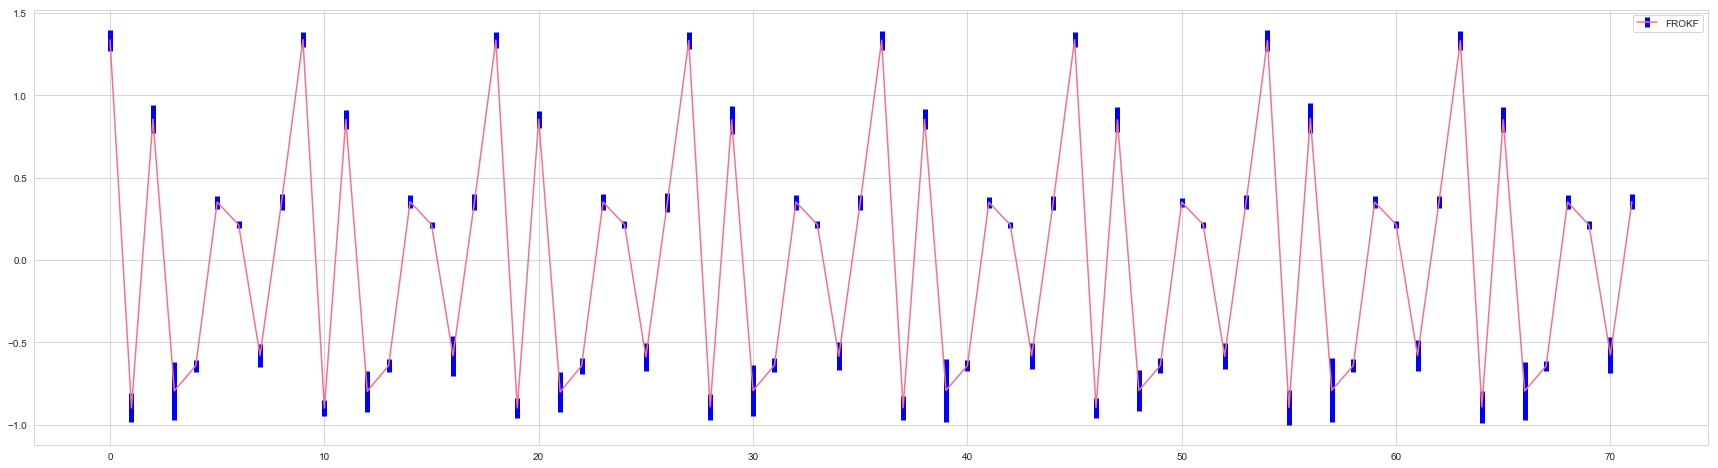

In [43]:
fig = plt.figure(figsize=(30, 8))
x = np.arange(linear_ret5.shape[0])
_ = plt.errorbar(x, linear_ret5['FROKF_mean'], yerr=linear_ret5['FROKF_var']*100, ecolor='b', elinewidth=5, label='FROKF')
_ = plt.legend(loc='upper right')

In [60]:
def vis_err(dtype, dim, root='../results/'):
    fig = plt.figure(figsize=(30, 8))
    data = eval(f'{dtype}_ret{dim}')
    x = np.arange(data.shape[0])
    _ = plt.errorbar(x, data['FROLS_mean'], yerr=data['FROLS_var']*100, fmt='o--', elinewidth=3, label='FROLS')
    _ = plt.errorbar(x, data['FROKF_mean'], yerr=data['FROKF_var']*100, fmt='o--', elinewidth=3, label='FROKF')
    _ = plt.legend(loc='upper right')
    plt.savefig(f'{root}{dtype}_{dim}D_errbar.png')

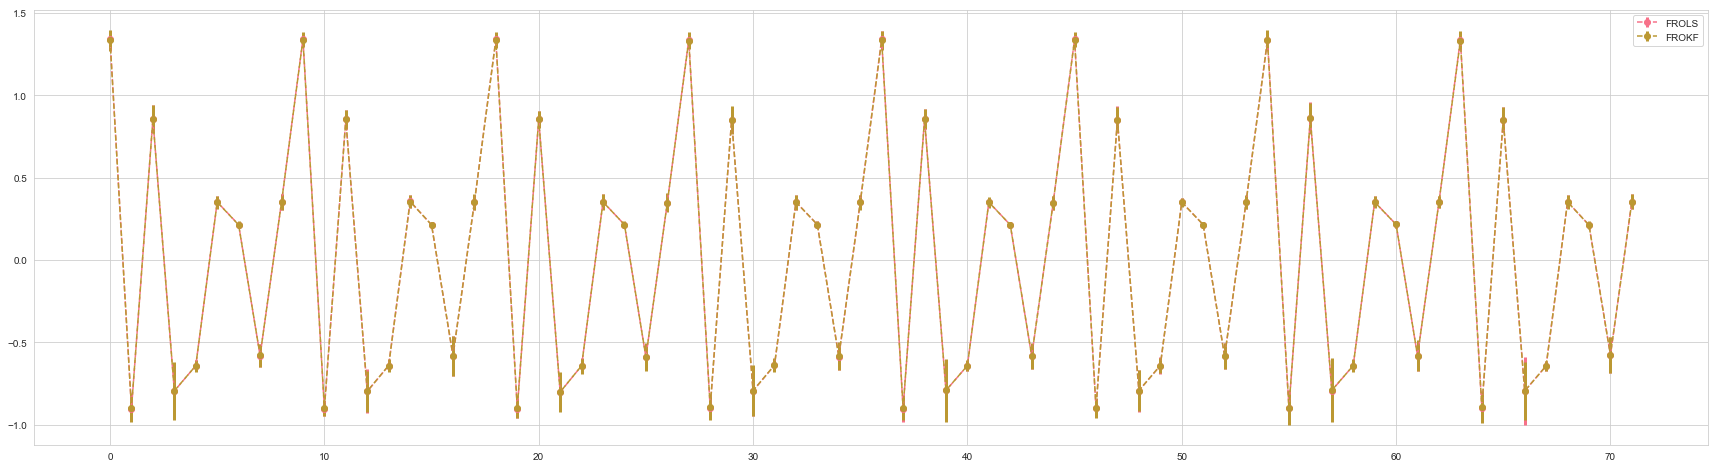

In [61]:
vis_err('linear', 5)

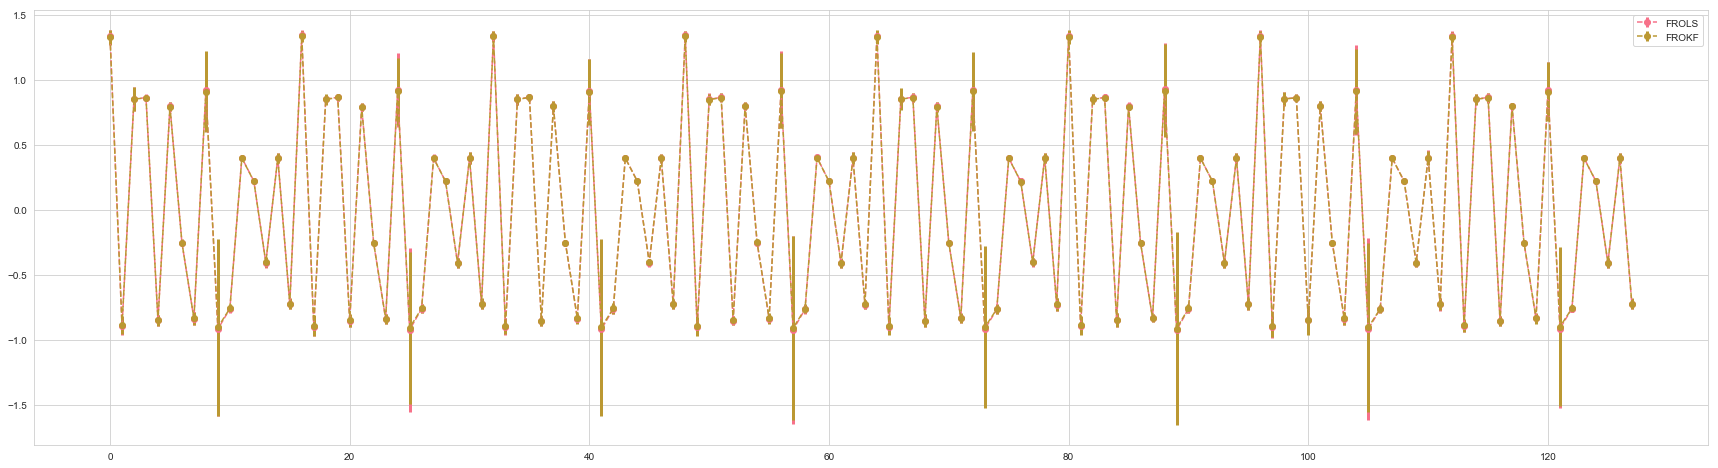

In [62]:
vis_err('linear', 10)

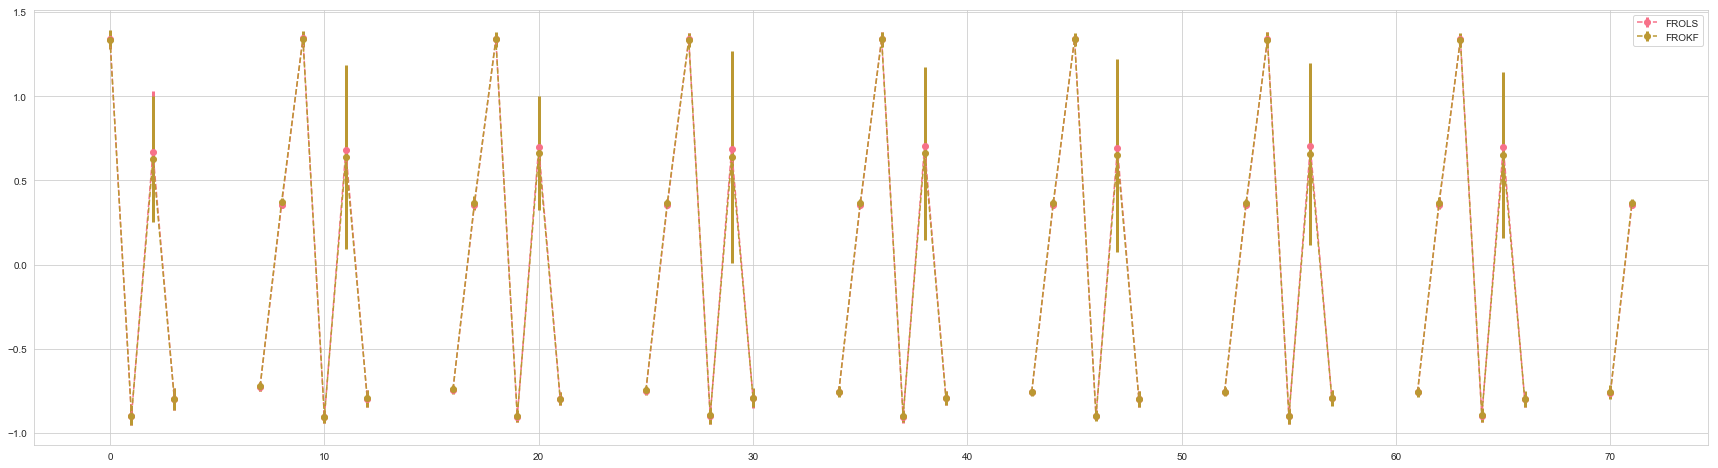

In [63]:
vis_err('nonlinear', 5)

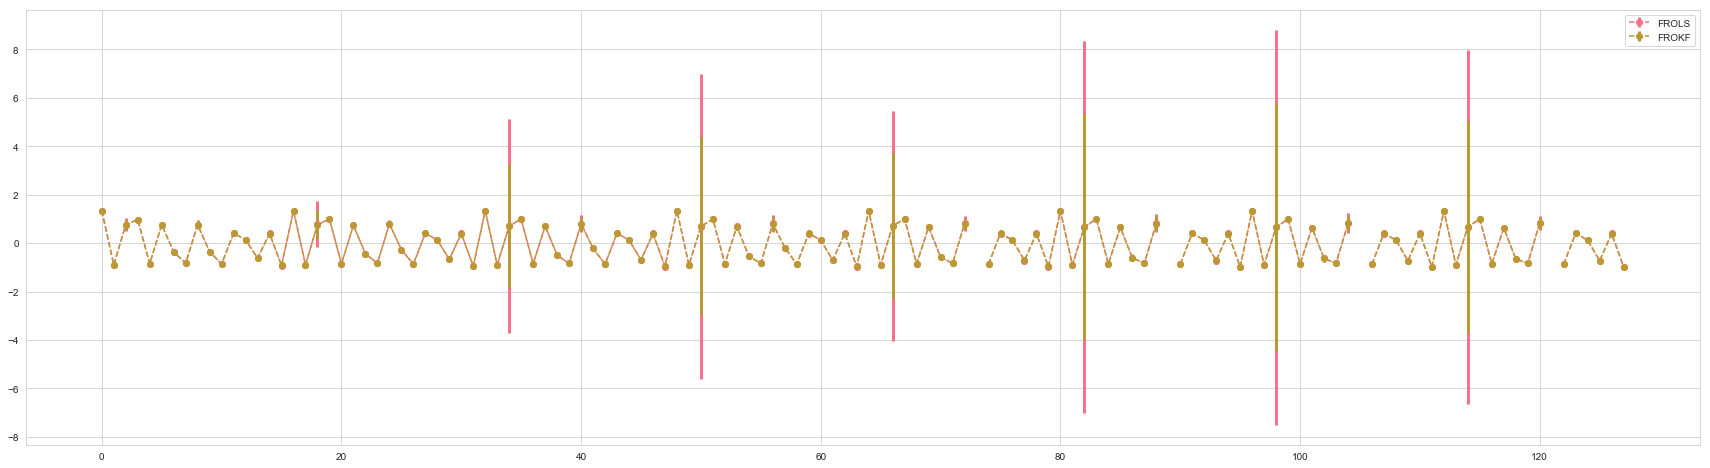

In [64]:
vis_err('nonlinear', 10)

In [49]:
nonlinear_ret10.head(18)

,noise_var,term,true_coef,FROLS_mean,FROLS_var,FROLS_mae,FROKF_mean,FROKF_var,FROKF_mae
0,0.5,x1(t-1),1.343503,1.335840,0.000445,0.007663,1.330359,0.000463,0.013144
1,0.5,x1(t-2),-0.902500,-0.895708,0.000329,0.006792,-0.891021,0.000344,0.011479
2,0.5,x1(t-2)*x1(t-10),0.500000,0.765400,0.002670,0.265400,0.753022,0.002120,0.253022
3,0.5,x2(t-3),0.900000,0.969222,0.000072,0.069222,0.967630,0.000095,0.067630
4,0.5,x1(t-2),-0.500000,-0.851687,0.000207,0.351687,-0.850130,0.000215,0.350130
5,0.5,x4(t-4),0.800000,0.759142,0.000148,0.040858,0.757255,0.000138,0.042745
6,0.5,x9(t-2),-0.400000,-0.361978,0.000407,0.038022,-0.361280,0.000458,0.038720
7,0.5,x4(t-4),-0.800000,-0.834947,0.000198,0.034947,-0.833250,0.000203,0.033250
8,0.5,x1(t-1)*x1(t-10),0.400000,0.765983,0.001735,0.365983,0.752866,0.001401,0.352866
9,0.5,x1(t-2),-0.400000,-0.358188,0.000377,0.041812,-0.358140,0.000380,0.041860


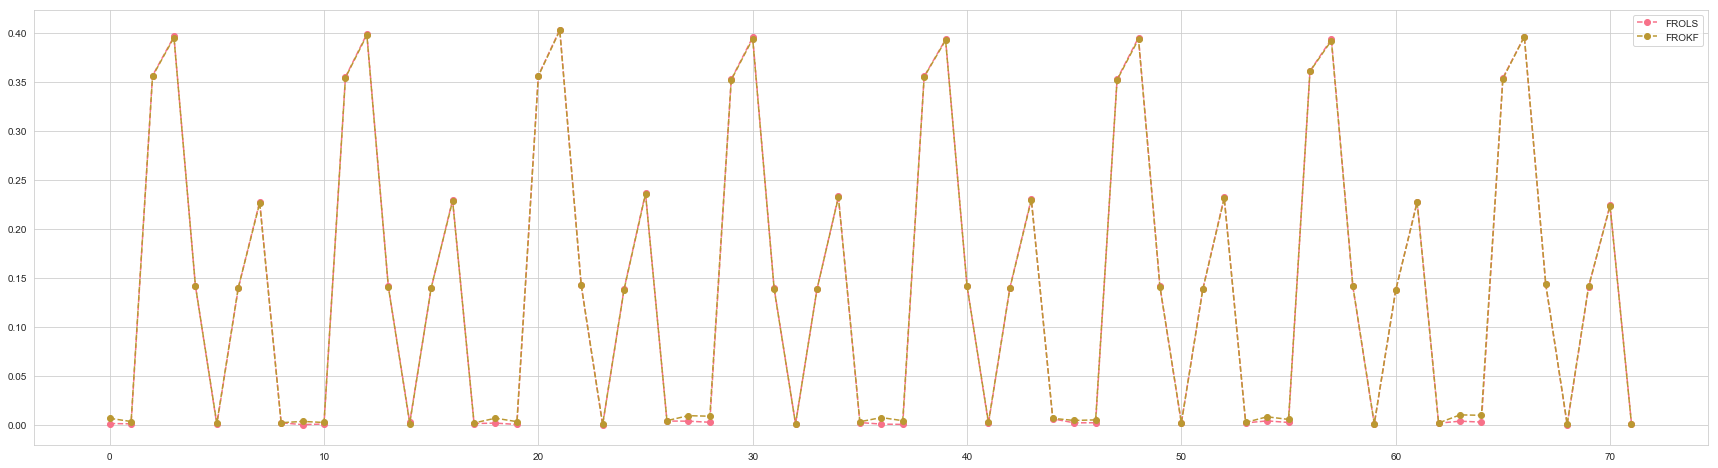

In [54]:
fig = plt.figure(figsize=(30, 8))
data = linear_ret5
x = np.arange(data.shape[0])
_ = plt.plot(x, data['FROLS_mae'], 'o--', label='FROLS')
_ = plt.plot(x, data['FROKF_mae'], 'o--', label='FROKF')
_ = plt.legend(loc='upper right')